In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys
import mpl_scatter_density
import mplhep as hep
import matplotlib
import mpl_scatter_density

sys.path.append('../')
from utils import load
import torch

In [2]:
epoch = 50

In [3]:
prefix = '/export/home/phys/kyungmip/L1DeepMETv2/'

ckpts = f'{prefix}/ckpts_April30_scale_sigmoid/'

### Plot straight from the histogram saved in resolutions file

In [4]:
plt.style.use(hep.style.CMS)

a=load(ckpts + '/best.resolutions')
colors = {
#    'pfMET': 'black',
    'puppiMET': 'red',
#    'deepMETResponse': 'blue',
#    'deepMETResolution': 'green',
    'MET':  'magenta',
}
label_arr = {
    'MET':     'Graph MET' ,
#    'pfMET':    'PF MET',
    'puppiMET': 'PUPPI MET',
#    'deepMETResponse': 'DeepMETResponse',
#    'deepMETResolution': 'DeepMETResolution',
}
resolutions_arr = {
    'MET':      [[],[],[]],
#    'pfMET':    [[],[],[]],
    'puppiMET': [[],[],[]],
#    'deepMETResponse': [[],[],[]],
#    'deepMETResolution': [[],[],[]],
}

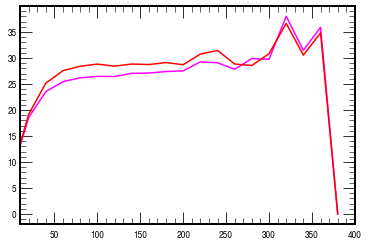

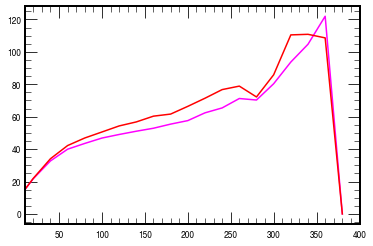

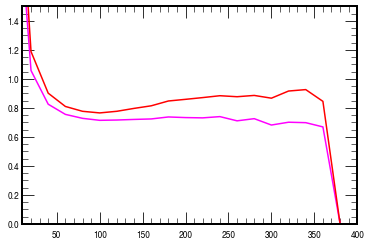

In [5]:
for key in resolutions_arr:
    #plt.figure(1)
    #xx = a[key]['u_perp_resolution'][1][0:40]
    #yy = a[key]['u_perp_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(2)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    #plt.figure(3)
    #xx = a[key]['u_par_resolution'][1][0:40]
    #yy = a[key]['u_par_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(4)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    plt.figure(5)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    
    plt.xlim([10,400])
    plt.ylim([0,1.5])

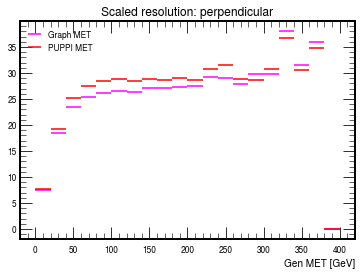

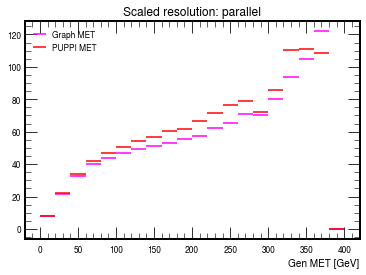

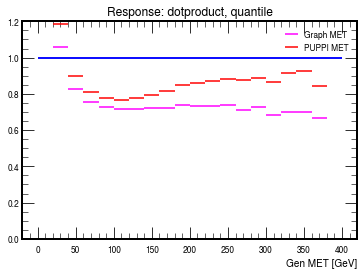

In [9]:
for key in resolutions_arr:
    # perp resolution scaled
    plt.figure(1)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: perpendicular')
    
    # parallel resolution scaled
    plt.figure(2)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]

    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: parallel')
    
    # response (using quantile)
    plt.figure(3)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')

    #plt.xlim([10,400])
    plt.ylim([0,1.2])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response: dotproduct, quantile')


In [10]:
genMETx = glob.glob('{}/epoch{}_genMETx*'.format(ckpts, epoch))[0]
genMETy = glob.glob('{}/epoch{}_genMETy*'.format(ckpts, epoch))[0]

#genMETx = glob.glob('{}/epoch{}_true_px*'.format(ckpts, epoch))[0]
#genMETy = glob.glob('{}/epoch{}_true_py*'.format(ckpts, epoch))[0]

METx = glob.glob('{}/epoch{}_METx*'.format(ckpts, epoch))[0]
METy = glob.glob('{}/epoch{}_METy*'.format(ckpts, epoch))[0]

puppiMETx = glob.glob('{}/epoch{}_puppiMETx*'.format(ckpts, epoch))[0]
puppiMETy = glob.glob('{}/epoch{}_puppiMETy*'.format(ckpts, epoch))[0]

In [11]:
genMETx = np.loadtxt(genMETx, delimiter=',')
genMETy = np.loadtxt(genMETy, delimiter=',')

METx = np.loadtxt(METx, delimiter=',')
METy = np.loadtxt(METy, delimiter=',')

puppiMETx = np.loadtxt(puppiMETx, delimiter=',')
puppiMETy = np.loadtxt(puppiMETy, delimiter=',')

### Plot predicted vs. gen MET

(-600.0, 600.0)

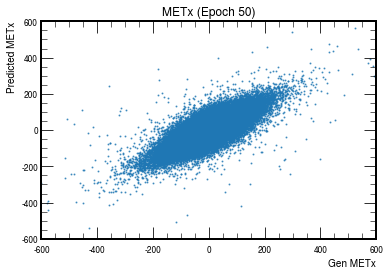

In [12]:
plt.scatter(genMETx, METx, s=1, alpha=0.7)
plt.xlabel('Gen METx')
plt.ylabel('Predicted METx')
plt.title(f'METx (Epoch {epoch})')

plt.xlim([-600,600])
plt.ylim([-600,600])

(-600.0, 600.0)

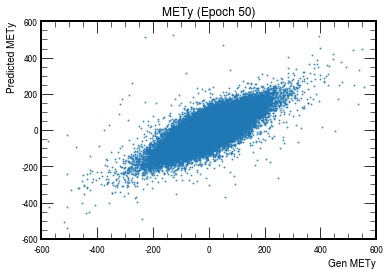

In [13]:
plt.scatter(genMETy, METy, s=1, alpha=0.7)
plt.xlabel('Gen METy')
plt.ylabel('Predicted METy')
plt.title(f'METy (Epoch {epoch})')

plt.xlim([-600,600])
plt.ylim([-600,600])

In [14]:
genMET = np.sqrt(genMETx **2 + genMETy **2)
MET = np.sqrt(METx **2 + METy **2)
puppiMET = np.sqrt(puppiMETx **2 + puppiMETy **2)

<ipython-input-15-1fc4d325c3ba>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(genMET, MET, s=0.1, alpha=0.7, norm=matplotlib.colors.LogNorm(), cmap='jet')


(0.0, 500.0)

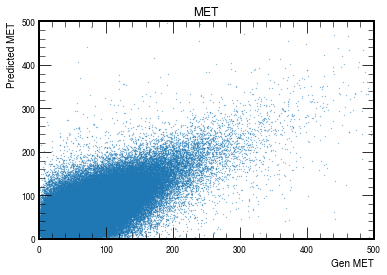

In [15]:
plt.scatter(genMET, MET, s=0.1, alpha=0.7, norm=matplotlib.colors.LogNorm(), cmap='jet')

#plt.colorbar()

plt.xlabel('Gen MET')
plt.ylabel('Predicted MET')
plt.title(f'MET')

plt.xlim([0,500])
plt.ylim([0,500])

In [16]:
# density plot
def plot_density(x, y, xlabel='', ylabel='', title='', zlabel='', xlim=[], doSave=False, figName='plot'):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1, 1, 1, projection='scatter_density')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    if len(xlim) != 0:
        ax1.set_xlim(xlim)
    ax1.set_title(title)

    density = ax1.scatter_density(x, y, cmap=plt.cm.get_cmap('magma'))
    fig1.colorbar(density, ax=ax1, fraction=0.045, pad=0.015, label=zlabel)
    
    if doSave:
        plt.savefig('{}.pdf'.format(figName),  bbox_inches='tight')
    
    plt.show()

### Calculate and plot the response

In [17]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(genMET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(genMET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))

# Take the mean for each bin
response = ml_means / truth_means

Text(0.5, 1.0, 'px, py, pT scaled by 128')

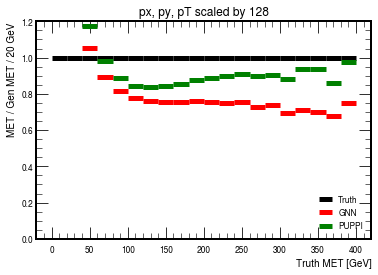

In [20]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Truth MET [GeV]')
plt.legend(loc='lower right')
plt.ylabel(f'MET / Gen MET / {binnings[1]-binnings[0]:.0f} GeV')

plt.title('px, py, pT scaled by 128')

### resolution

In [21]:
qTx = torch.from_numpy(genMETx)
qTy = torch.from_numpy(genMETy)

v_qT = torch.stack((qTx, qTy), dim=1)

In [22]:
MLMETx = torch.from_numpy(METx)
MLMETy = torch.from_numpy(METy)

v_MET = torch.stack((MLMETx, MLMETy), dim=1)

In [24]:
PUPPIMETx = torch.from_numpy(puppiMETx)
PUPPIMETy = torch.from_numpy(puppiMETy)

v_puppiMET = torch.stack((PUPPIMETx, PUPPIMETy), dim=1)

In [25]:
# tensor operations
def getdot(vx, vy):
    return torch.einsum('bi,bi->b',vx,vy)

def getscale(vx):
    return torch.sqrt(getdot(vx,vx))

def scalermul(a,v):
    return torch.einsum('b,bi->bi',a,v)

In [26]:
resolutions_arr = {}

def compute(vector):
    #response = getdot(vector,v_qT)/getdot(v_qT,v_qT)
    response = getscale(vector)/getscale(v_qT)

    v_paral_predict = scalermul(response, v_qT)
    u_paral_predict = getscale(v_paral_predict) - getscale(v_qT)
    v_perp_predict = vector - v_paral_predict
    u_perp_predict = getscale(v_perp_predict)
    
    return [u_perp_predict.numpy(), u_paral_predict.numpy(), response.numpy()]

In [27]:
resolutions_arr['MET'] = compute(v_MET)
resolutions_arr['puppiMET'] = compute(v_puppiMET)

In [28]:
# compute mean of all metrics in summary

qT_arr = genMET

max_x=400 # max qT value
x_n=20 # number of bins

bin_edges=np.arange(0, max_x, max_x/x_n)

inds=np.digitize(qT_arr, bin_edges)

qT_hist=[]
for i in range(1, len(bin_edges)):
    qT_hist.append((bin_edges[i]+bin_edges[i-1])/2.)


In [29]:
resolution_hists = {}

In [30]:
for key in resolutions_arr:
    R_arr=resolutions_arr[key][2] 
    u_perp_arr=resolutions_arr[key][0]
    u_par_arr=resolutions_arr[key][1]

    u_perp_hist=[]
    u_perp_scaled_hist=[]
    u_par_hist=[]
    u_par_scaled_hist=[]
    R_hist=[]

    for i in range(1, len(bin_edges)):
        R_i=abs(R_arr[np.where(inds==i)[0]])
        R_hist.append(np.mean(R_i))
            
        u_perp_i=u_perp_arr[np.where(inds==i)[0]]
        u_perp_scaled_i=u_perp_i/np.mean(R_i)
        u_perp_hist.append((np.quantile(u_perp_i,0.84)-np.quantile(u_perp_i,0.16))/2.)
        u_perp_scaled_hist.append((np.quantile(u_perp_scaled_i,0.84)-np.quantile(u_perp_scaled_i,0.16))/2.)
            
        u_par_i=u_par_arr[np.where(inds==i)[0]]
        u_par_scaled_i=u_par_i/np.mean(R_i)
        u_par_hist.append((np.quantile(u_par_i,0.84)-np.quantile(u_par_i,0.16))/2.)
        u_par_scaled_hist.append((np.quantile(u_par_scaled_i,0.84)-np.quantile(u_par_scaled_i,0.16))/2.)

    u_perp_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_perp_hist)
    u_perp_scaled_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_perp_scaled_hist)
    u_par_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_par_hist)
    u_par_scaled_resolution=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=u_par_scaled_hist)
        
    R=np.histogram(qT_hist, bins=x_n, range=(0,max_x), weights=R_hist)
        
    resolution_hists[key] = {
        'u_perp_resolution': u_perp_resolution,
        'u_perp_scaled_resolution': u_perp_scaled_resolution,
        'u_par_resolution': u_par_resolution,
        'u_par_scaled_resolution':u_par_scaled_resolution,
        'R': R
    }

In [31]:
resolution_hists

{'MET': {'u_perp_resolution': (array([35.06101278, 29.77394879, 25.93815969, 23.37375702, 21.75955452,
          20.76938355, 20.31476524, 20.66947514, 20.56977819, 20.96939448,
          20.93935998, 22.26296202, 21.80282951, 19.96909166, 22.71146453,
          20.5980371 , 28.32662599, 23.27671204, 28.18664559,  0.        ]),
   array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
          220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])),
  'u_perp_scaled_resolution': (array([ 8.68277552, 19.77726675, 24.48648593, 26.07963149, 26.55547051,
          26.68633383, 26.62600619, 27.35963006, 27.31911201, 27.58865434,
          27.80861186, 29.64012401, 28.81747652, 27.50993389, 30.83039344,
          29.73894935, 39.7409478 , 33.15807532, 41.65472136,  0.        ]),
   array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
          220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])),
  'u_par_resolution': (array([23.72375016,

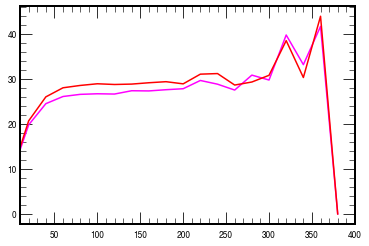

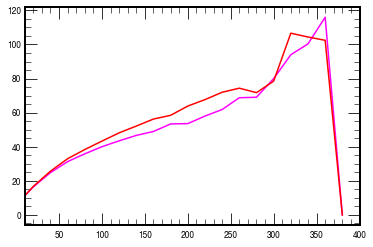

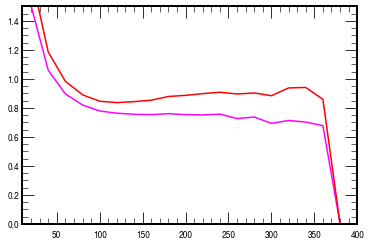

In [32]:
a = resolution_hists

for key in resolutions_arr:
    #plt.figure(1)
    #xx = a[key]['u_perp_resolution'][1][0:40]
    #yy = a[key]['u_perp_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(2)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    #plt.figure(3)
    #xx = a[key]['u_par_resolution'][1][0:40]
    #yy = a[key]['u_par_resolution'][0]
         
    #plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.figure(4)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]
         
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    plt.xlim([10,400])
    
    plt.figure(5)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.plot(xx, yy,color=colors[key], label=label_arr[key])
    
    plt.xlim([10,400])
    plt.ylim([0,1.5])
    


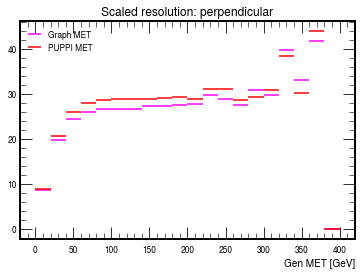

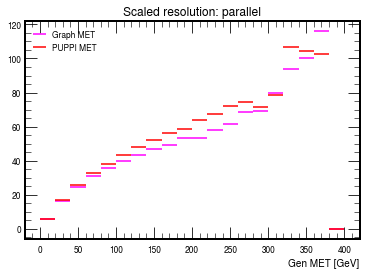

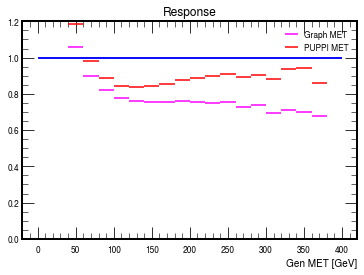

In [33]:
for key in resolutions_arr:
    # perp resolution scaled
    plt.figure(1)
    xx = a[key]['u_perp_scaled_resolution'][1][0:20]
    yy = a[key]['u_perp_scaled_resolution'][0]
         
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: perpendicular')
    
    # parallel resolution scaled
    plt.figure(2)
    xx = a[key]['u_par_scaled_resolution'][1][0:20]
    yy = a[key]['u_par_scaled_resolution'][0]

    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.legend(loc='upper left')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Scaled resolution: parallel')
    
    # response (using quantile)
    plt.figure(3)
    xx = a[key]['R'][1][0:20]
    yy = a[key]['R'][0]
    plt.hlines(yy, xx, xx+20, color=colors[key], label=label_arr[key])
    
    plt.hlines(np.ones(len(xx)), xx, xx+20, color='b')

    #plt.xlim([10,400])
    plt.ylim([0,1.2])
    
    plt.legend(loc='upper right')
    plt.xlabel('Gen MET [GeV]')
    plt.title('Response')


### Plot in the bins of genMET

In [34]:
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

#truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))

gen_MET = []
ml_MET = []
puppi_MET = []

for i in range(len(binnings)-1):
    mask_genMET = (genMET >= binnings[i]) & (genMET < binnings[i+1])
    
    idx_event = np.where(mask_genMET)
    
    gen_MET.append(genMET[idx_event])
    ml_MET.append(MET[idx_event])
    puppi_MET.append(puppiMET[idx_event])

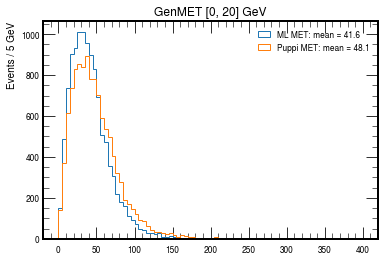

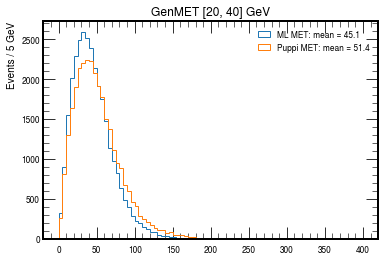

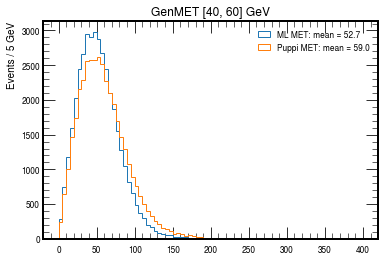

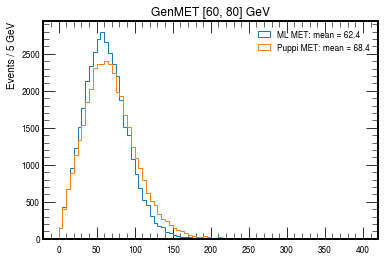

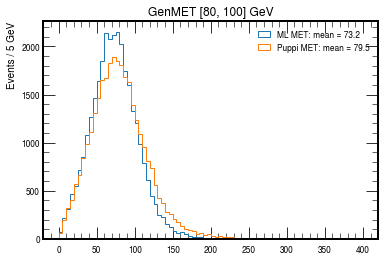

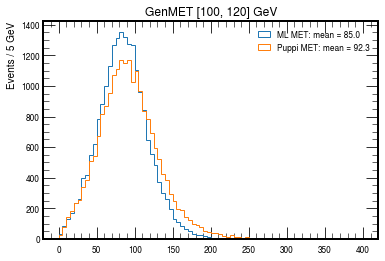

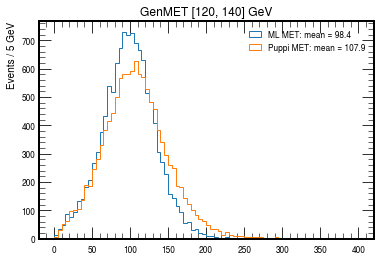

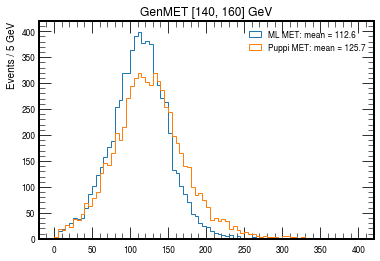

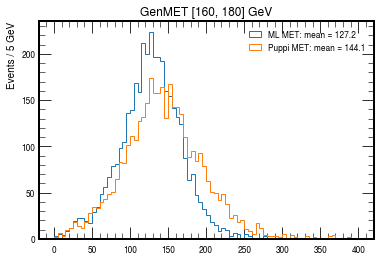

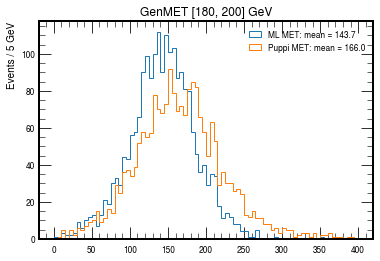

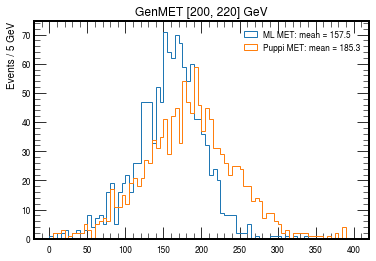

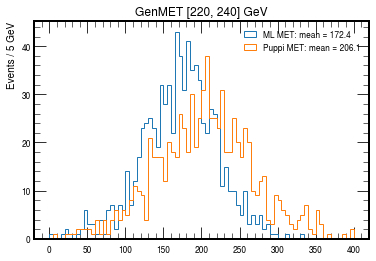

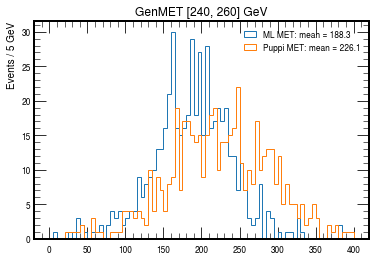

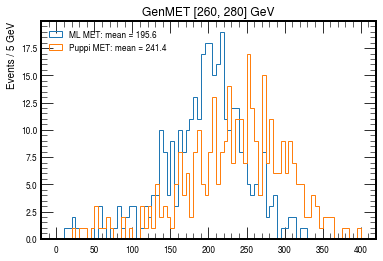

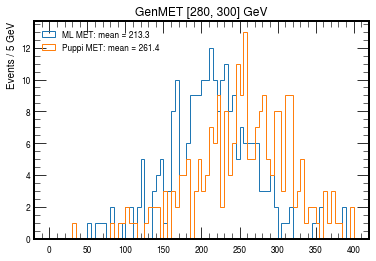

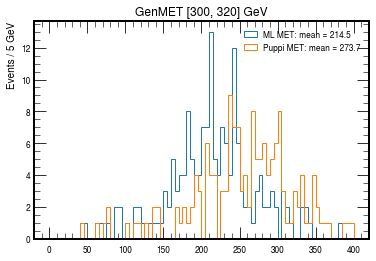

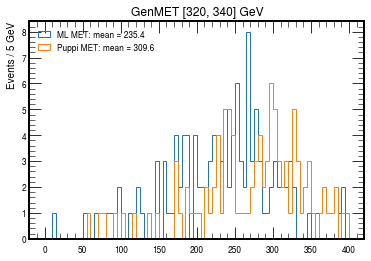

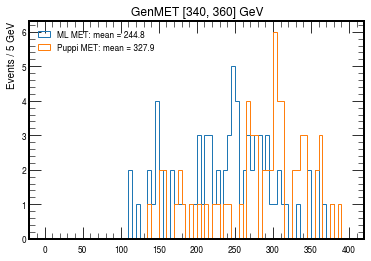

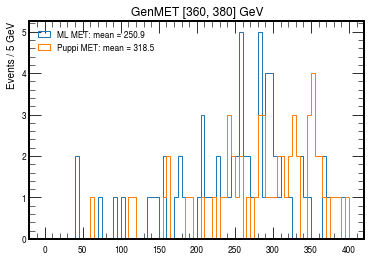

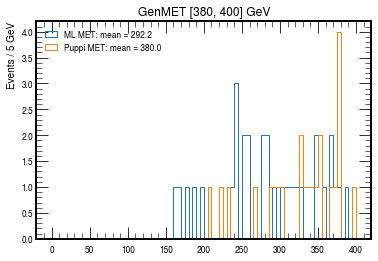

In [35]:
hist_bins = np.linspace(0, 400, num=80+1)

bin_i = 0

for bin_i in range(len(ml_MET)):
    plt.figure()
    
    plt.hist(ml_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'ML MET: mean = {ml_MET[bin_i].mean():.1f}')
    #plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=True, label='Gen MET')
    plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')


    plt.ylabel('Events / 5 GeV')

    plt.title(f'GenMET [{binnings[bin_i]:.0f}, {binnings[bin_i+1]:.0f}] GeV')
    plt.legend()
    
    plt.show()

### Response in the bins of regressed MET

In [36]:
# Bin the MET
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

# Using the binning information, put the response_pT into the binned list
from scipy.stats import binned_statistic
truth_means, bin_edges, binnumber = binned_statistic(MET, genMET, statistic='mean', bins=binnings, range=(0, 400))
ml_means,  _, _ = binned_statistic(MET, MET, statistic='mean', bins=binnings, range=(0, 400))
puppi_means,  _, _ = binned_statistic(MET, puppiMET, statistic='mean', bins=binnings, range=(0, 400))


Text(0.5, 1.0, 'Response')

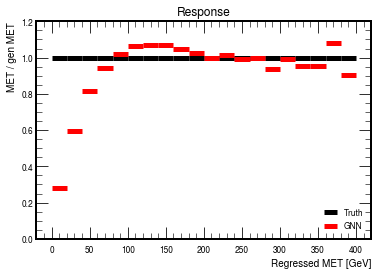

In [38]:
plt.hlines(truth_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5,
               label='Truth', linestyles='solid')
plt.hlines(ml_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5,
               label='GNN', linestyles='solid')
#plt.hlines(puppi_means/truth_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=5,
#               label='PUPPI', linestyles='solid')

plt.ylim(0, 1.2)
plt.xlabel('Regressed MET [GeV]')
plt.legend(loc='lower right')
#plt.ylabel(f'Response / {binnings[1]-binnings[0]:.0f} GeV')
plt.ylabel('MET / gen MET')

plt.title('Response')

### Plot in the bins of ML MET

In [58]:
nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

#truth_means, bin_edges, binnumber = binned_statistic(genMET, genMET, statistic='mean', bins=binnings, range=(0, 400))

gen_MET = []
ml_MET = []
puppi_MET = []

for i in range(len(binnings)-1):
    mask_mlMET = (MET >= binnings[i]) & (MET < binnings[i+1])
    
    idx_event = np.where(mask_mlMET)
    
    gen_MET.append(genMET[idx_event])
    ml_MET.append(MET[idx_event])
    puppi_MET.append(puppiMET[idx_event])

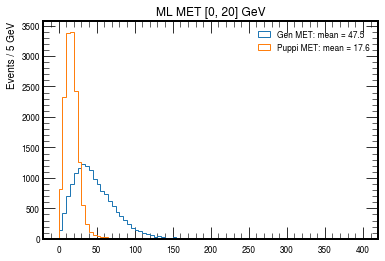

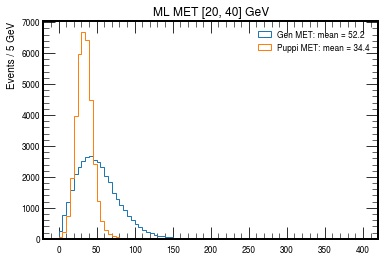

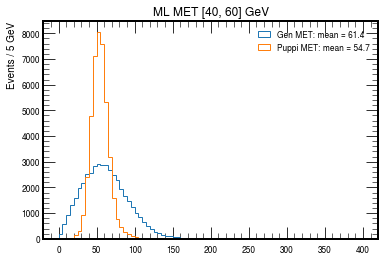

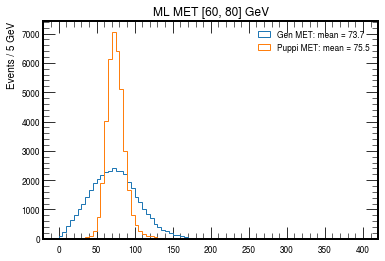

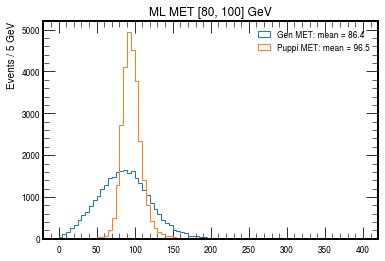

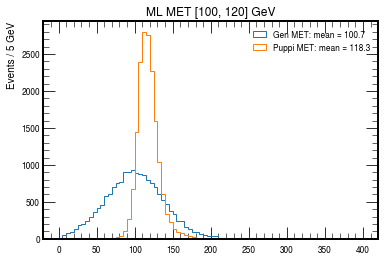

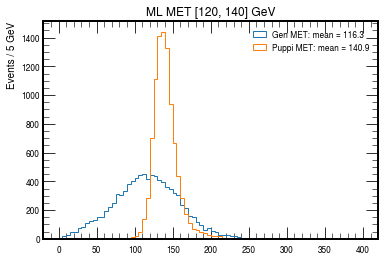

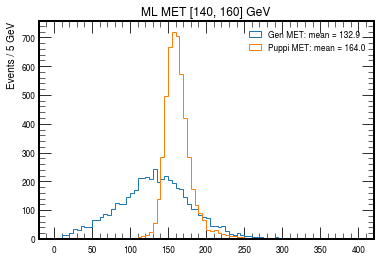

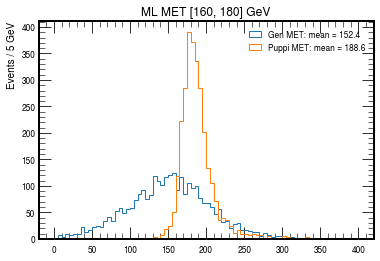

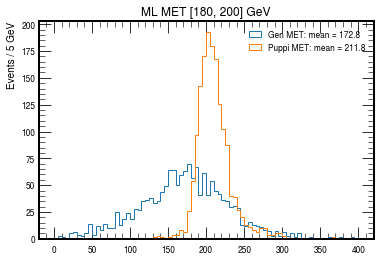

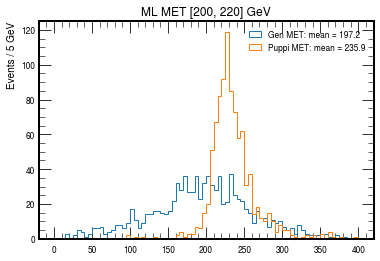

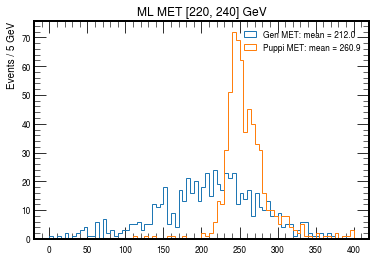

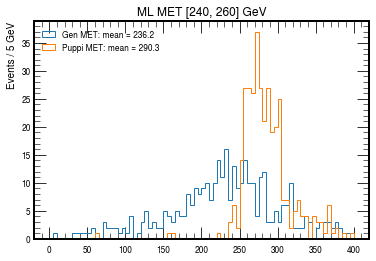

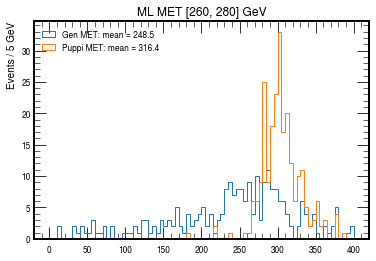

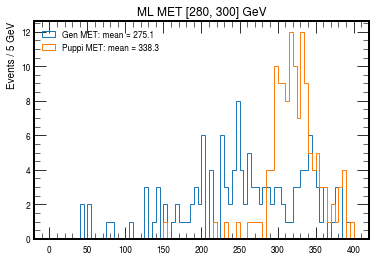

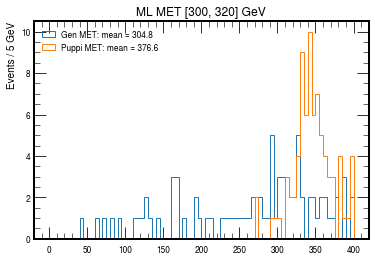

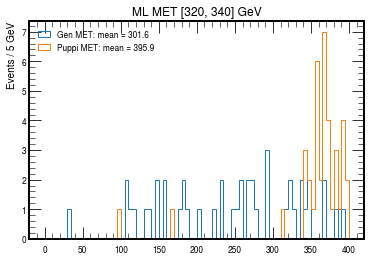

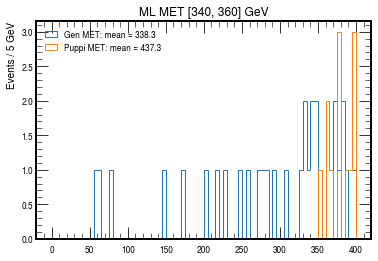

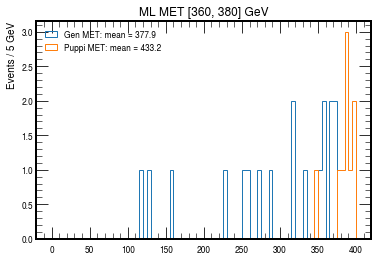

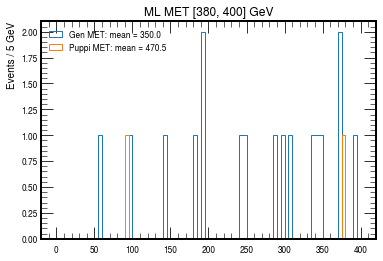

In [59]:
hist_bins = np.linspace(0, 400, num=80+1)

bin_i = 0

for bin_i in range(len(ml_MET)):
    plt.figure()
    
    #plt.hist(ml_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'ML MET: mean = {ml_MET[bin_i].mean():.1f}')
    plt.hist(gen_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Gen MET: mean = {gen_MET[bin_i].mean():.1f}')
    plt.hist(puppi_MET[bin_i], bins=hist_bins, histtype='step', density=False, label=f'Puppi MET: mean = {puppi_MET[bin_i].mean():.1f}')

    plt.ylabel('Events / 5 GeV')

    plt.title(f'ML MET [{binnings[bin_i]:.0f}, {binnings[bin_i+1]:.0f}] GeV')
    plt.legend()
    
    plt.show()

### Plot genMET histogram

In [60]:
genMET = np.array(genMET)
genMET_binned = []

nbins = 20
binnings = np.linspace(0, 400, num=nbins+1)

for idx in range(len(binnings)-1):
    genMET_binned.append( np.logical_and(genMET > binnings[idx], genMET < binnings[idx+1]) )

In [61]:
MLMET = np.array(MET)
MLMET_binned = []

for idx in range(len(binnings)-1):
    MLMET_binned.append( np.logical_and(MLMET > binnings[idx], MLMET < binnings[idx+1]) )

In [62]:
puppiMET = np.array(puppiMET)
puppiMET_binned = []

for idx in range(len(binnings)-1):
    puppiMET_binned.append( np.logical_and(puppiMET > binnings[idx], puppiMET < binnings[idx+1]) )

In [63]:
genMET_binned_entries = [sum(genMET_binned[i]) for i in range(len(genMET_binned))]

In [64]:
MLMET_binned_entries = [sum(MLMET_binned[i]) for i in range(len(MLMET_binned))]

In [67]:
puppiMET_binned_entries = [sum(puppiMET_binned[i]) for i in range(len(puppiMET_binned))]

In [68]:
import ROOT as r

hGenMET = r.TH1D('genMET', 'genMET', nbins, 0, 400)
hMLMET = r.TH1D('MLMET', 'MLMET', nbins, 0, 400)
hPuppiMET = r.TH1D('PuppiMET', 'puppiMET', nbins, 0, 400)

Welcome to JupyROOT 6.24/02


In [69]:
for i in range(nbins):
    hGenMET.SetBinContent(i+1, genMET_binned_entries[i])
    hMLMET.SetBinContent(i+1, MLMET_binned_entries[i])
    hPuppiMET.SetBinContent(i+1, puppiMET_binned_entries[i])

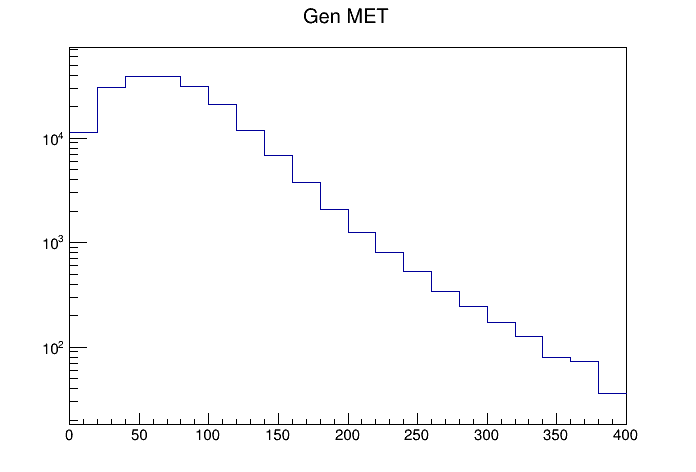

In [70]:
r.gStyle.SetOptStat(0)

c = r.TCanvas()

'''
hMLMET.Draw()
hMLMET.GetXaxis().SetTitle('MET')
hMLMET.GetYaxis().SetTitle('Events / 20GeV')
hMLMET.SetTitle('MET')
'''

hGenMET.Draw()
hGenMET.SetTitle('Gen MET')

'''
hPuppiMET.Draw('SAME')

hMLMET.SetLineColor(2)
hGenMET.SetLineColor(4)
hPuppiMET.SetLineColor(6)

legend = r.TLegend(0.6,0.65,0.9,0.85)
r.gStyle.SetLegendBorderSize(0)
legend.AddEntry(hMLMET,"ML MET","f")
legend.AddEntry(hGenMET,"GenMET","l")
legend.AddEntry(hPuppiMET, "PuppiMET")
legend.Draw('SAME')

'''
c.SetLogy()

c.Draw()